In [417]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
import os

In [3]:
data = pd.read_csv("/kaggle/input/online-food-dataset/onlinefoods.csv")

In [4]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [5]:
data.drop(columns='Unnamed: 12', inplace=True)

In [6]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [8]:
age_buy_count = data.groupby('Age').size().reset_index(name='count')
fig = px.bar(age_buy_count, x='Age', y='count')
fig.show()

In [9]:
age_buy_count = data.groupby('Gender').size().reset_index(name='count')
fig = px.pie(age_buy_count, values='count', names='Gender')
fig.show()

In [10]:
age_buy_count = data.groupby('Monthly Income').size().reset_index(name='count')
fig = px.bar(age_buy_count, y='count', x='Monthly Income', color='Monthly Income')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [13]:
# We see that the Monthly Income will affect buy/not buy. 
gender_age_buy_count = data.groupby(['Gender', 'Age', 'Monthly Income']).size().reset_index(name='count')
fig = px.bar(gender_age_buy_count, x="Age", y="count",
             color='Gender', barmode='group',
             height=400, facet_row='Monthly Income')
fig.show()

In [19]:
# We assume that the age and income have positive relatoinship.
# We can see that young people will prefer buy food via online
gender_age_buy_count.groupby("Monthly Income")['Age'].mean()

Monthly Income
10001 to 25000     25.153846
25001 to 50000     26.421053
Below Rs.10000     24.090909
More than 50000    27.526316
No Income          23.909091
Name: Age, dtype: float64

In [195]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [201]:
data.drop('Output', axis=1)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Positive
...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Positive
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Positive


In [268]:
# one hot
# convert dataframe to tensor
def helper(x):
    convert = {"Yes": 1,
               "No": 0}
    return convert[x]


In [363]:
# Separate features and labels
y = np.array(list((map(helper, data['Output'])))).astype('int64')
data_one_hot = pd.get_dummies(data.drop('Output', axis=1)).values.astype('float32') 

# Convert features and labels to PyTorch tensors
features_tensor = torch.tensor(data_one_hot)
labels_tensor = torch.tensor(y)

# Create a TensorDataset
dataset = TensorDataset(features_tensor, labels_tensor)

# Wrap the dataset in a DataLoader
batch_size = 64  # Adjust batch size to your preference
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [374]:
# create the model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
#         self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.BatchNorm1d(26),
            nn.Linear(26, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 2),
        )

    def forward(self, x):
#         x = self.flatten(x)
        x = self.linear_relu_stack(x)
        x = F.log_softmax(x, dim=1)
        return x


In [377]:
# Example loss function and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()  # Common choice for classification tasks
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer
# Example training loop
for epoch in range(10):
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass: Compute predicted y by passing inputs to the model
        outputs = model(inputs)
        # Compute loss
        loss = criterion(outputs, labels)
        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print statistics
#         if (i+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{10}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    

Epoch [1/10], Step [1/7], Loss: 0.6692
Epoch [1/10], Step [2/7], Loss: 0.6667
Epoch [1/10], Step [3/7], Loss: 0.6452
Epoch [1/10], Step [4/7], Loss: 0.6358
Epoch [1/10], Step [5/7], Loss: 0.6378
Epoch [1/10], Step [6/7], Loss: 0.6236
Epoch [1/10], Step [7/7], Loss: 0.5808
Epoch [2/10], Step [1/7], Loss: 0.5972
Epoch [2/10], Step [2/7], Loss: 0.5832
Epoch [2/10], Step [3/7], Loss: 0.5827
Epoch [2/10], Step [4/7], Loss: 0.6031
Epoch [2/10], Step [5/7], Loss: 0.5707
Epoch [2/10], Step [6/7], Loss: 0.5845
Epoch [2/10], Step [7/7], Loss: 0.7059
Epoch [3/10], Step [1/7], Loss: 0.5663
Epoch [3/10], Step [2/7], Loss: 0.5276
Epoch [3/10], Step [3/7], Loss: 0.5175
Epoch [3/10], Step [4/7], Loss: 0.5367
Epoch [3/10], Step [5/7], Loss: 0.5188
Epoch [3/10], Step [6/7], Loss: 0.5594
Epoch [3/10], Step [7/7], Loss: 0.6327
Epoch [4/10], Step [1/7], Loss: 0.5119
Epoch [4/10], Step [2/7], Loss: 0.5165
Epoch [4/10], Step [3/7], Loss: 0.5272
Epoch [4/10], Step [4/7], Loss: 0.3988
Epoch [4/10], Step [5/7],

In [412]:
test = pd.get_dummies(data.drop('Output', axis=1)).values.astype('float32') 
features_tensor = torch.tensor(test).float()[200:]
y_true = y[200:]
with torch.no_grad():
    model.eval()

    predictions = model(features_tensor)

    # Convert predictions to probabilities using softmax if your model's output is logits
    probabilities = torch.softmax(predictions, dim=1)

    # Convert the probabilities to a numpy array
    # This step is optional and depends on what format you want for further processing.
    probabilities_np = probabilities.numpy()

# The probabilities now contain the predicted class probabilities for each sample.
# If you need to get the predicted class with the highest probability:
y_pred = torch.argmax(probabilities, dim=1).numpy()

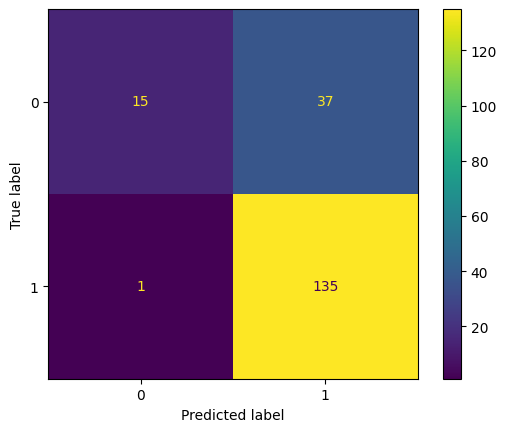

In [416]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()